Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

## LOGISTIC REGRESSION

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

Remember that the probability of belonging to the class (*y*=1) is provided by the sigmoid function:

$$
g(z)=\frac{1}{1+e^{-z}}, \space where \space z=w^Tx
$$

$g(z) \in{[0,1]}$

Let's look at the sigmoid function closely:

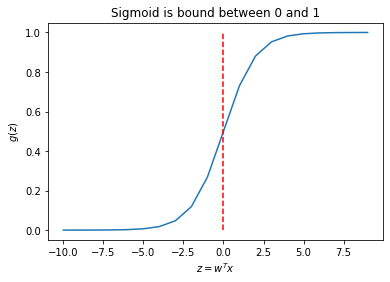

In [3]:
def sig(z):
    return 1/(1+np.exp(-z))

x = np.array(range(-10,10))
pyplot.plot(x, sig(x))
pyplot.plot([0,0],[0,1], color='red', linestyle='dashed' )
pyplot.xlabel('$z = w^Tx$')
pyplot.ylabel('$g(z)$')
pyplot.title('Sigmoid is bound between 0 and 1', loc='center')
pyplot.show()

When $z=0$, $g(z)=0.5$ which is intuitively the boundary between two classes.

For our predictions, we can go with the following function:
$$
\hat{y}=
    \begin{cases}
      1 & \text{if $\theta(z)\geq 0.5$}\\
      0 & \text{otherwise}
    \end{cases} 
$$

### How does the cross-entropy loss relate to the sigmoid function?

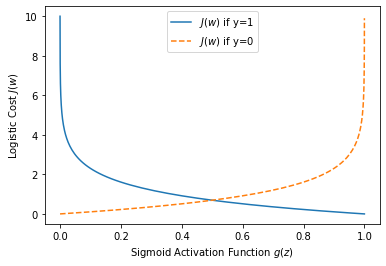

In [4]:
def sig(z):
    return 1/(1+np.exp(-z))

def cost_1(z):
    return -np.log(sig(z))

def cost_0(z):
    return -np.log(1-sig(z))

z = np.arange(-10, 10, 0.1)

phi_z = sig(z)
c1 = cost_1(z)
c0 = cost_0(z)

pyplot.plot(phi_z, c1, phi_z, c0, '--')
pyplot.legend(['$J(w)$ if y=1', '$J(w)$ if y=0'])
pyplot.xlabel('Sigmoid Activation Function $g(z)$')
pyplot.ylabel('Logistic Cost $J(w)$')
pyplot.show()

Cost approaches 0 if we correctly predict the class. If we are wrong, it goes to infinity.

Please note $w$ in the graph are the weights ($\theta$ in the lecture notes).

## First example: Iris dataset

In [5]:
data = datasets.load_iris()

In [6]:
print(data['DESCR'][:1482] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print(data.data.shape)   
#print(data.data)

(150, 4)


In [131]:
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [9]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [10]:
iris_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
14,5.8,4.0,1.2,0.2,0.0
98,5.1,2.5,3.0,1.1,1.0
75,6.6,3.0,4.4,1.4,1.0
16,5.4,3.9,1.3,0.4,0.0
131,7.9,3.8,6.4,2.0,2.0


In [12]:
iris_df[iris_df['target']==0].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


In [13]:
iris_df[iris_df['target']==1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.000000,50.000000,50.000000,50.000000,50.0
mean,5.936000,2.770000,4.260000,1.326000,1.0
std,0.516171,0.313798,0.469911,0.197753,0.0
min,4.900000,2.000000,3.000000,1.000000,1.0
25%,5.600000,2.525000,4.000000,1.200000,1.0
50%,5.900000,2.800000,4.350000,1.300000,1.0
75%,6.300000,3.000000,4.600000,1.500000,1.0
max,7.000000,3.400000,5.100000,1.800000,1.0


In [14]:
iris_df[iris_df['target']==2].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


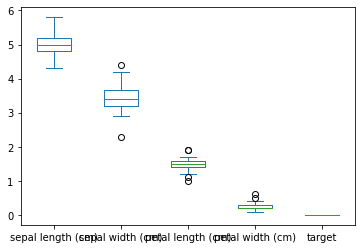

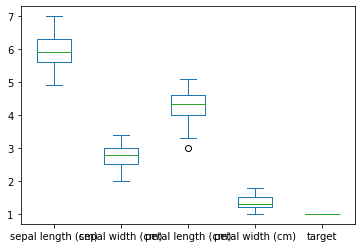

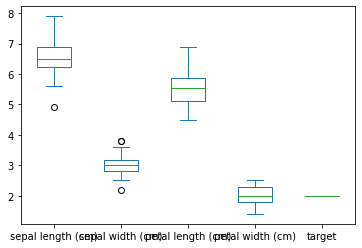

In [15]:
iris_df[iris_df['target']==0].plot.box()   #setosa
iris_df[iris_df['target']==1].plot.box()   #versicolor
iris_df[iris_df['target']==2].plot.box()   #virginica

From the description plots above, we can see that Class=0 is characteristically much different than Class=1 and Class=2. It is the only class where petal length is lower than sepal width.

Scatter plots below verify this observation as well.

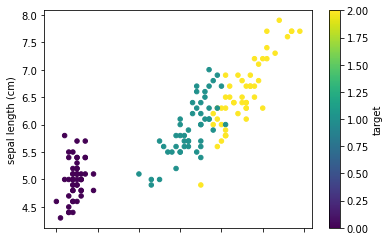

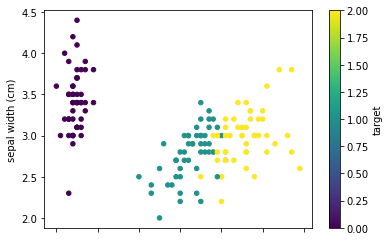

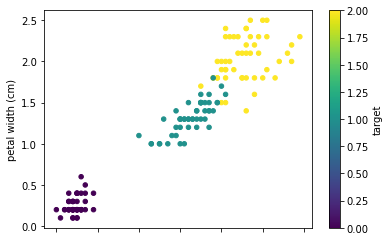

In [16]:
iris_df.plot.scatter(x='petal length (cm)',y='sepal length (cm)',s=20,c='target',colormap='viridis')
iris_df.plot.scatter(x='petal length (cm)',y='sepal width (cm)',s=20,c='target',colormap='viridis')
iris_df.plot.scatter(x='petal length (cm)',y='petal width (cm)',s=20,c='target',colormap='viridis')
#iris_df.plot.scatter(x='petal width (cm)',y='sepal length (cm)',s=10,c='target',colormap='viridis')
#iris_df.plot.scatter(x='petal width (cm)',y='sepal width (cm)',s=10,c='target',colormap='viridis')
#iris_df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',s=10,c='target',colormap='viridis')
#help(iris_df.plot.scatter)

In [103]:
# Make the data sets, train/test/validate
# We will train our parameters on the training set.
# We will make an initial evaluation on the validation set, make some more decisions.
# Finally, test set will only be used to observe final performance.
# Remember we shuffled the dataset, so it is safe to take first 90 as training set.
train_df = iris_df.iloc[0:90]
val_df = iris_df.iloc[90:120]
test_df = iris_df.iloc[120:150]

Now, when applying Logistic Regression, pay attention to the parameter $C$. It is 'Inverse of regularization strength' with default value 1.0.

In [129]:
#lr_orig = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=100, multi_class='auto')
# l2 is the choice of regularization term, C is the inverse of regularization strength (lambda)
lr_orig = LogisticRegression(C=0.01, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])   #(X,y)
#help(train_df.drop)
#help(lr_orig)
#print(lr_orig.coef_)


LogisticRegression(C=0.01, max_iter=1000)

#### Look in the documentation before using the models:

class sklearn.linear_model.LogisticRegression(  
penalty='l2',      
dual=False,   
tol=0.0001,   
C=1.0,   
fit_intercept=True,   
intercept_scaling=1,   
class_weight=None,   
random_state=None,   
solver='lbfgs',   
max_iter=100,   
multi_class='auto',   
verbose=0,   
warm_start=False,   
n_jobs=None,  
l1_ratio=None  
)

In [19]:
print(sum(lr_orig.predict(train_df.drop('target', axis=1))==train_df['target']), "/",len(train_df['target']))

print(sum(lr_orig.predict(val_df.drop('target', axis=1))==val_df['target']), "/", len(val_df['target']))

72 / 90
24 / 30


# Regularization
LogisticRegression() supports $L1$ and $L2$ regularization.

Recall the original cross-entropy loss:

$$
J(w)=\sum{[-y^{(i)}log(g(z^{(i)}))-(1-y^{(i)})log(1-g(z^{(i)})]}
$$

Adding $L2$:

$$
J(w)=\sum{[-y^{(i)}log(g(z^{(i)}))-(1-y^{(i)})log(1-g(z^{(i)})]}+\lambda ||w||^2
$$

In the above, increasing $\lambda$ increasing the penalty for larger weights and will shrink our coefficient estimates.

### scikit-learn Implements this using the inverse of $\lambda$, smaller $C$ increases Regularization!

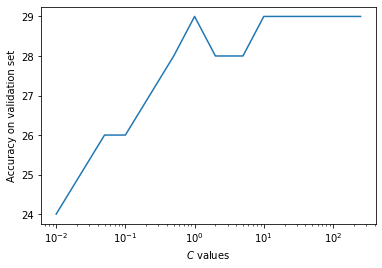

In [20]:
cvals = [0.01, 0.05, 0.1, 0.5, 1.0, 2, 5, 10, 50, 250]
results = np.zeros(10)
index=0
for cv in cvals:
    lr = LogisticRegression(penalty='l2', C=cv, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
    lr.fit(train_df.drop(['target'], axis=1),train_df['target'])
    u=sum(lr.predict(val_df.drop('target', axis=1))==val_df['target'])
    results[index]=u
    index+=1

x = np.array(range(0,10))
pyplot.plot(cvals, results)
#help(pyplot.xscale)
pyplot.xscale('log')
pyplot.xlabel('$C$ values')
pyplot.ylabel('Accuracy on validation set')
pyplot.show()

Deciding on the best $C$ value is not easy. It is a hyperparameter. Using test data to see that is not proper. We should **not** see the test data until final performance evaluation. To choose hyperparameters ($C$, model complexity etc.), we spare a separate section of the data as **validation set**. We'll elaborate this more in an upcoming lecture.

Deciding that $C=10$ is a good choice, let's see the performance on the test set which we have not seen before.

In [21]:
lr = LogisticRegression(penalty='l2', C=10, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
lr.fit(train_df.drop(['target'], axis=1),train_df['target'])
u=sum(lr.predict(test_df.drop('target', axis=1))==test_df['target'])
print(u,'/30')

29 /30


In [22]:
#Another way to see the accuracy on test set is lr.score
lr.score(test_df.drop(['target'], axis=1), test_df['target'])   # takes X and y

0.9666666666666667

## A New Example Where Linear Boundary is insufficient

In [23]:
help(datasets.make_moons)

Help on function make_moons in module sklearn.datasets._samples_generator:

make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles.
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or tuple of shape (2,), dtype=int, default=100
        If int, the total number of points generated.
        If two-element tuple, number of points in each of two moons.
    
        .. versionchanged:: 0.23
           Added two-element tuple.
    
    shuffle : bool, default=True
        Whether to shuffle the samples.
    
    noise : float, default=None
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None, default=None
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible o

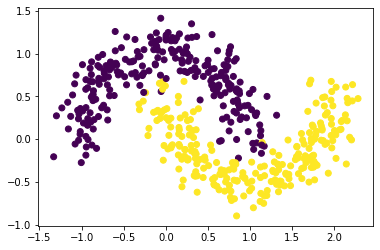

In [24]:
d=datasets.make_moons(n_samples=500, noise=0.15)  #try noise=None
pyplot.scatter(x=d[0][::,0],y=d[0][::,1],c=d[1])


In [25]:
X = d[0]
y = d[1]
X_train = X[0:300, :]
y_train = y[0:300]
X_val = X[300:, :]
y_val = y[300:]
print(X_val.shape)
print(X_train.shape)
print(y_train.shape)

#pyplot.scatter(x=X_train[:,0],y=X_train[:,1], c=y_train)

(200, 2)
(300, 2)
(300,)


In [26]:
#lr = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, solver='lbfgs', max_iter=100, multi_class='auto')
lr = LogisticRegression()
lr.fit(X_train, y_train)
#help(lr)

LogisticRegression()

In [27]:
lr.score(X_val, y_val)

0.885

Let's see how the estimated boundary looks like.

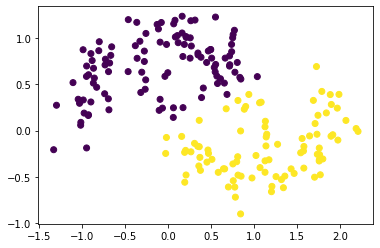

In [28]:
pyplot.scatter(x=X_val[:,0],y=X_val[:,1], c=lr.predict(X_val))

With only two features, Logistic Regression is able to fit only linear boundaries. Not surprisingly it does not perform well, because classes are not linearly separable.

We write a method that increases the number of features from 2 to 10. First it adds three new features, namely $x^2$, $x\cdot y$ and $y^2$.
Last 5 features are sinusoids of first 5 features, i.e. $sin(x)$, $sin(y)$, $sin(x^2)$, $sin(x\cdot y)$ and $sin(y^2)$. These features help Logistic Regression to fit a non-linear boundary.

In [29]:
def addFeatures(X_orig, X_new):
  for row in range(X_orig.shape[0]):
    
    #First two features are just copies of the original two features 
    col = 0
  
    X_new[row, col] = X_orig[row, col]
    col += 1
  
    X_new[row, col] = X_orig[row, col]
    col += 1
    
    #Now we crate new features that do not exist in the original data
    
    X_new[row, col] = X_orig[row, 0]*X_orig[row, 0]  # x^2
    col += 1
    
    X_new[row, col] = X_orig[row, 0]*X_orig[row, 1]  # x*y
    col += 1
    
    X_new[row, col] = X_orig[row, 1]*X_orig[row, 1]  # y^2
    col += 1
    
    num_cur_features = col
    for j in range(num_cur_features):  # 5 times
      X_new[row, col] = np.sin(X_new[row, j])
      col += 1

In [30]:
X_train_p = np.zeros((X_train.shape[0], 10))
X_val_p = np.zeros((X_val.shape[0], 10))
print(X_train_p.shape)
print(X_val_p.shape)

(300, 10)
(200, 10)


In [31]:
addFeatures(X_train, X_train_p)
addFeatures(X_val, X_val_p)
print(X_train_p.shape)
print(X_val_p.shape)

(300, 10)
(200, 10)


In [32]:
lr = LogisticRegression(penalty='l2', C=10, fit_intercept=True, solver='lbfgs', max_iter=500, multi_class='auto')
lr.fit(X_train_p, y_train)

LogisticRegression(C=10, max_iter=500)

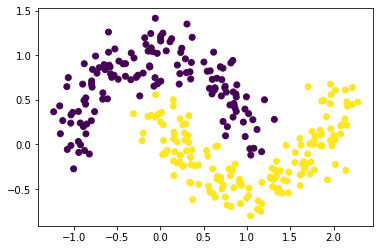

In [33]:
pyplot.scatter(x=X_train_p[:,0], y=X_train_p[:,1], c=lr.predict(X_train_p))

What about the performance on the validation data?

In [34]:
lr.score(X_val_p, y_val)

0.985

Note the improved performance with extra features. Lets plot the predicted classes on validation data.

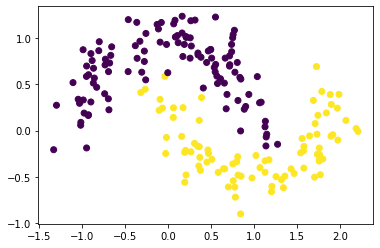

In [35]:
pyplot.scatter(x=X_val_p[:,0], y=X_val_p[:,1], c=lr.predict(X_val_p))

# Homework 2: Due 29 Sept 2022, 11:59 PM

Q1) Regarding our Logistic Regression model on Iris dataset, write a function which creates a 3 by 3 table/matrix such that:
  - row $i$ column $j$ shows the number of elements of type $i$ that were classified as type $j$.
  - note the diagonal is the count of correctly classified elements.
  - this matrix is known as 'confusion matrix' 

Use your function to create the confusion matrix on the test set of Iris dataset.

Q2) Try creating new features to the Iris Dataset by multiplying/squaring various current features together. (e.g. area = length*width)

Can we increase the performance on the test set? Compare the performance with lr.score.

Important: While comparing the two approaches (original features and increased no of features) you should fix the train and test sets. If you resplit the dataset and get results with increased features, it can no more be comparable to the initial score (the one with original features).

# **Ques:1**

# For Train Data 

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
y_train_predict =lr_orig.predict(train_df.drop(['target'],axis=1))  #lr_orig model to predict the train  


In [79]:
import numpy as np

def confusion_matrix(actual, predicted):
   data_classes = np.unique(actual) #np.unique will give unique clases from the actual value
   matrix_confusion = np.zeros((len(data_classes), len(data_classes))) #creation a 3x3 matrix 
   for i in range(len(data_classes)): 
     for j in range(len(data_classes)):
       matrix_confusion[i, j] = np.sum((actual == data_classes[i]) & (predicted == data_classes[j])) #updating the  values where actual and predicted values are same in the matrix which is created above.
   ax = plt.axes()
   plt.title('Confusion matrix for Iris Classification')
   confusio_mat = sns.heatmap(matrix_confusion, ax = ax,annot=True)
   return confusio_mat

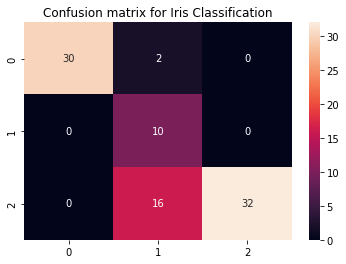

In [80]:
confusion_matrix(y_train_predict,train_df['target'])
plt.show()

# For Test Data

In [81]:
y_test_predict =lr_orig.predict(test_df.drop(['target'],axis=1))

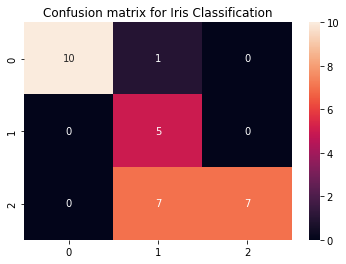

In [85]:
confusion_matrix(y_test_predict,test_df['target'])
plt.show()


# Ques 2

**Increasing more features in Iris Data set**

In [133]:
more_features_df =iris_df.copy()                                                                                                                                                                    

In [134]:
more_features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [137]:
more_features_df['sepal_area'] = more_features_df['sepal length (cm)'] * more_features_df['sepal width (cm)'] #adding one more column called sepal area

In [135]:
more_features_df['petal_area']= more_features_df['petal length (cm)'] * more_features_df['petal width (cm)'] #adding one more column called petal area

In [138]:
more_features_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0.0,0.28,17.85
1,4.9,3.0,1.4,0.2,0.0,0.28,14.70
2,4.7,3.2,1.3,0.2,0.0,0.26,15.04
3,4.6,3.1,1.5,0.2,0.0,0.30,14.26
4,5.0,3.6,1.4,0.2,0.0,0.28,18.00
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,11.96,20.10
146,6.3,2.5,5.0,1.9,2.0,9.50,15.75
147,6.5,3.0,5.2,2.0,2.0,10.40,19.50
148,6.2,3.4,5.4,2.3,2.0,12.42,21.08


In [148]:
#original dataset
train_df = iris_df.iloc[0:120]
test_df= iris_df.iloc[120:150]
#added feature dataset
train_df_m = more_features_df.iloc[0:120]
test_df_m = more_features_df.iloc[120:150]

In [176]:
lr_more_features= LogisticRegression(C=0.1, max_iter=1000)  #changing the regularizer value to 1 randomly 
lr_more_features.fit(train_df_m.drop(['target'],axis=1),train_df_m['target'])

LogisticRegression(C=0.1, max_iter=1000)

In [185]:
print("Featured data Train Score :",lr_more_features.score(train_df_m.drop(['target'],axis=1),train_df_m['target']))

Featured data Train Score : 0.9833333333333333


In [179]:
lr_orig= LogisticRegression(C=0.1, max_iter=1000) #changing the regularizer value to 1 randomly 
lr_orig.fit(train_df.drop(['target'],axis=1),train_df['target'])

LogisticRegression(C=0.1, max_iter=1000)

In [187]:
print("Original data Train Score :", lr_orig.score(train_df.drop(['target'],axis=1),train_df['target']))

Original data Train Score : 0.925


In [181]:
print("Featured data Test Score :",lr_more_features.score(test_df_m.drop(['target'],axis=1),test_df_m['target'])

0.7666666666666667

In [188]:
print("Orignal data Test Score",lr_orig.score(test_df.drop(['target'],axis=1),test_df['target']))

Orignal data Test Score 0.6


# **Comparing Orginal VS Featured data**

In [190]:
from prettytable import PrettyTable     
# Creating a new table   
newTable = PrettyTable(["Dataset", "Train Score", "Test Score"])  
  
# Add rows  
newTable.add_row(["Original Dataset", "0.92", "0.6"])  
newTable.add_row(["Fetured Dataset", "0.98", "0.76"])  

print(newTable)                                                                                       

+------------------+-------------+------------+
|     Dataset      | Train Score | Test Score |
+------------------+-------------+------------+
| Original Dataset |     0.92    |    0.6     |
| Fetured Dataset  |     0.98    |    0.76    |
+------------------+-------------+------------+


How to increase the performance of the model?

There are two ways:

1) We can use cross-validation get the optimal C value which can give high result.

2) We need to do more feature enginerring on dataset.